<a href="https://colab.research.google.com/github/TonpaZoldyck/Studies/blob/main/Group_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

We will beging by cleaning the data and checking for null values then we will explore the different variables to try to understand the data, identify different parameters and


Sources: http://salserver.org.aalto.fi/opinnot/mat-2.4177/2018/McKinseyFinal.pdf

https://escholarship.org/uc/item/9zg7157q


In [ ]:
countryNo_referal = ["Domican Republic", "England"]
countriesoneM_referal = ["DRC", "England"]
vals = ["Domican Republic", "DRC"]
Amnt = [100000, 100000]
limit = 1000000
refornot = []
for i in range(len(vals)):
  if vals[i] in countryNo_referal:
    print("No Referal")
    refornot.append("No Referal")
  elif vals[i] in countriesoneM_referal and Amnt[i] < limit:
    print("No Referal")
    refornot.append("No Referal")
  else:
    print("Referal")
    refornot.append("Referal")

print(refornot)

No Referal
No Referal
['No Referal', 'No Referal']


## 1. Data import

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Others
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")



In [ ]:
from google.colab import files
uploaded = files.upload()

MessageError: ignored

In [ ]:
import io
train_data = pd.read_csv(io.BytesIO(uploaded['CreditCard_train.csv']), header=1)
df=pd.DataFrame(train_data)

In [ ]:
#df = pd.read_csv('CreditCard_train.csv', header = 1)
df.columns = ["ID", 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', "Default"]
df = df.drop("ID", axis =1) # remove ID collumn has no predictive power

In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.columns, df.shape

(Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
        'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
        'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
       dtype='object'), (24000, 24))

In [ ]:
df.describe()


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
count,24000.000000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.000000,24000.000000,24000.000000,24000.000000,2.400000e+04,24000.00000,24000.000000,24000.000000,24000.000000,24000.000000
mean,165495.986667,1.628250,1.847417,1.55725,35.380458,-0.003125,-0.12350,-0.154750,-0.211667,-0.252917,-0.278000,50596.884708,48646.064125,4.636706e+04,42368.188417,40000.682542,38563.710625,5542.912917,5.815336e+03,4969.26600,4743.480042,4783.486042,5189.399042,0.223750
std,129128.744855,0.483282,0.780007,0.52208,9.271050,1.123425,1.20058,1.204033,1.166549,1.136993,1.158169,72649.374256,70364.600436,6.819390e+04,63070.680934,60345.012766,59155.759799,15068.576072,2.079703e+04,16095.61434,14883.269990,15270.405279,17630.371990,0.416765
min,10000.000000,1.000000,0.000000,0.00000,21.000000,-2.000000,-2.00000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.00000,28.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,3631.500000,3098.500000,2.773500e+03,2340.000000,1740.000000,1234.750000,1000.000000,8.000000e+02,379.00000,279.750000,244.000000,60.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.00000,34.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,22330.000000,21339.000000,2.003900e+04,18940.500000,18107.500000,17036.000000,2100.000000,2.000000e+03,1702.50000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.00000,41.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,65779.500000,62761.250000,5.929800e+04,52188.500000,49746.500000,48796.250000,5000.000000,5.000000e+03,4347.25000,4000.000000,4005.000000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.00000,79.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.00000,497000.000000,417990.000000,528666.000000,1.000000


## 2. Data transformation and exploration

__2.1 Data Cleaning__

In [ ]:
df.isnull().sum().max() # checking for null values

0

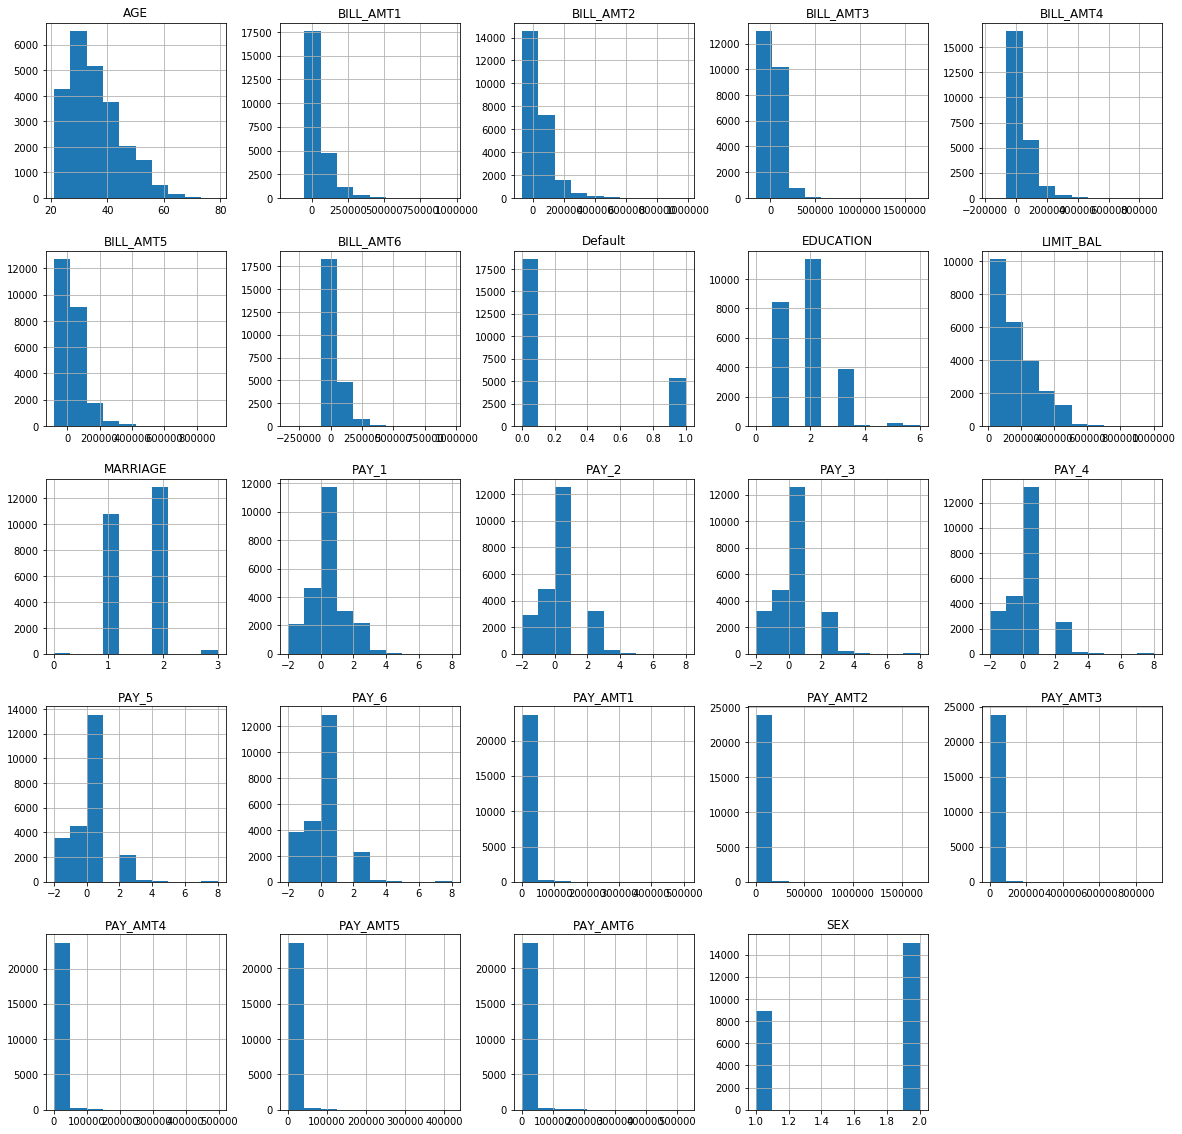

CPU times: user 2.94 s, sys: 34.1 ms, total: 2.98 s
Wall time: 2.99 s


In [ ]:
%%%time
df.hist(figsize= (20,20)) #prelim look at distribution of data
plt.show()

In [ ]:
## Data formating and preprocessing

fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0) # change the extra values of education into other
df.loc[fil, 'EDUCATION'] = 4
df.EDUCATION.value_counts()



df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3 # change extra values of marrigage into other
df.MARRIAGE.value_counts()

2    12877
1    10813
3      310
Name: MARRIAGE, dtype: int64

In [ ]:
### Pay should integer values -1 to 9 excluding 0, seems that the -2 and 0 values have some meaning and are not mistaks as its unlikely that this many
### are accidents,
Pay1Default = pd.crosstab(index=df["Default"],
                            columns=df["PAY_1"])
Pay1Default


PAY_1,-2,-1,0,1,2,3,4,5,6,7,8
Default,,,,,,,,,,,
0,1810,3814,10236,1979,685,63,22,8,4,1,8
1,276,811,1503,1015,1500,191,44,9,5,6,10


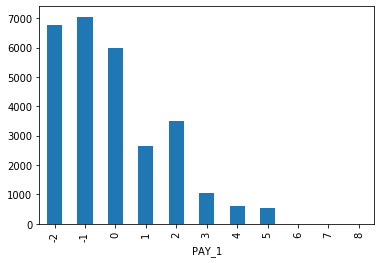

In [ ]:
df.groupby('PAY_1')['PAY_AMT1'].mean().plot(kind='bar')
plt.show()
## here we see the distribution of the PAY_1 variable based on the amount of people in each.

So the -2 Actually means that no consumption, 0 means use of revolving credit.

Sources:http://inseaddataanalytics.github.io/INSEADAnalytics/CourseSessions/ClassificationProcessCreditCardDefault.html#a_process_for_classification

__2.2 Data Exploration__

In [ ]:
#finding the split of default vs non-default
print('No Frauds', round(df['Default'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Frauds', round(df['Default'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

No Frauds 77.62 % of the dataset
Frauds 22.38 % of the dataset


Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

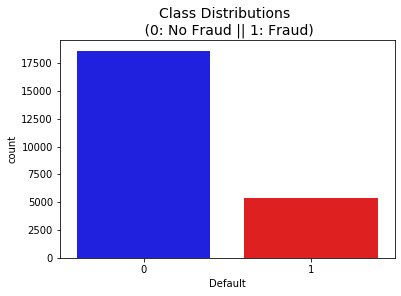

In [ ]:
colors = ["blue", "red"]

sns.countplot('Default', data=df, palette=colors)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

This is a reasonably balanced data set especially considering for most fraud detection cases data sets are heavily imbalanced

Code Source: https://www.sciencedirect.com/science/article/pii/S0957417407006719

__2.3 Grouping and analysis of different variabels__

We decided to group similar types of variables and analyse them together. Here we saught to identify any correlations between the variabes and compare their distributions.
We grouped them into demograhic variables, payment status and then bill and paid amount.

Code Source: Adapted from Class Notebook 4

In [ ]:
#Group the variables into similar or alike features to compare together
demographic = ['SEX', 'EDUCATION', 'MARRIAGE','AGE']
payment_status = [ 'PAY_1', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
bill_amount = ['BILL_AMT1', 'BILL_AMT2','BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', "LIMIT_BAL"]
paid_amount = [ 'PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']


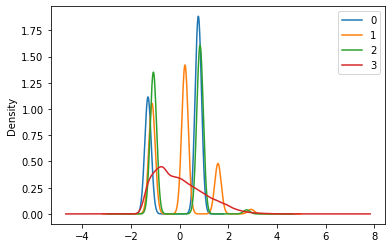

In [ ]:
## Code adapted from Class notebooks

df1 = df[demographic]
scaler = StandardScaler() # we scaled the variables to compare their distributions
df1 = scaler.fit_transform(df1)

df1 = pd.DataFrame.from_records(df1)
df1.plot.kde(legend = True)

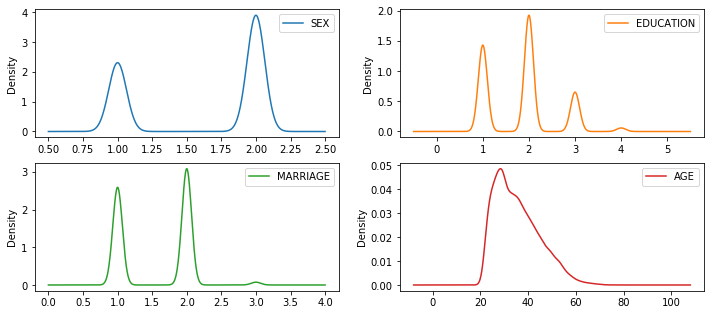

In [ ]:
df1 = df[demographic]
df1.plot(kind='density',subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(12, 8))
plt.show()

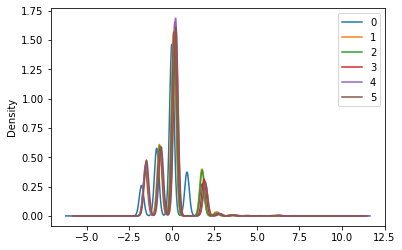

In [ ]:
df1 = df[payment_status]
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

df1 = pd.DataFrame.from_records(df1)
df1.plot.kde()

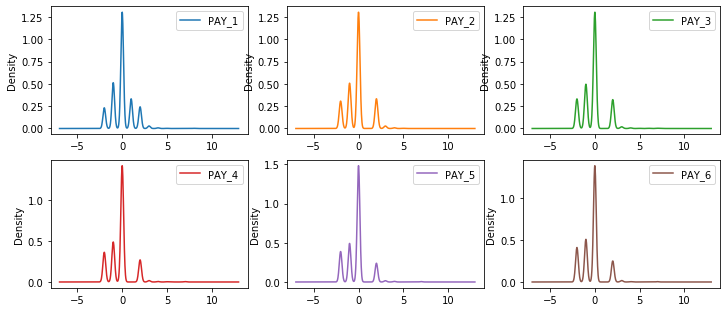

In [ ]:
df1 = df[payment_status]
df1.plot(kind='density',subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(12, 8))
plt.show()



We see that the PAY variables have very similar almost identical distributions, this gives us an idea that we would not want to include all of them in our models as they are telling us the same things

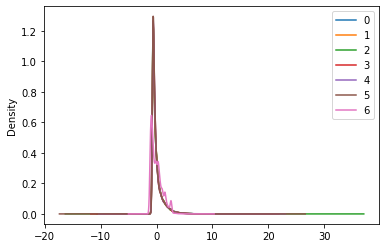

In [ ]:
df1 = df[bill_amount]
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

df1 = pd.DataFrame.from_records(df1)
df1.plot.kde()

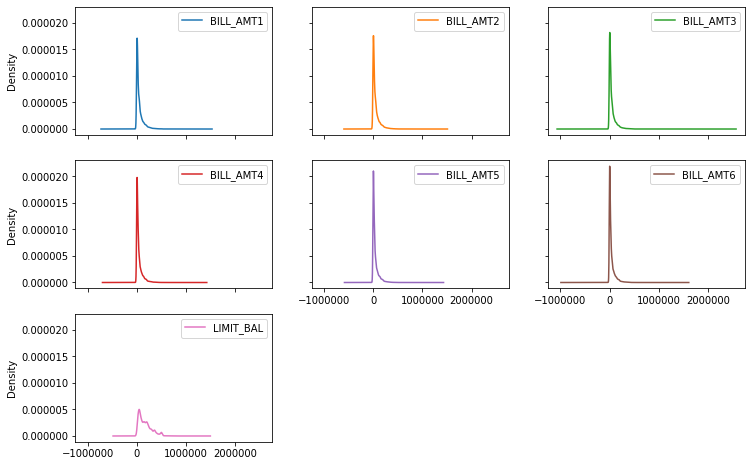

In [ ]:
df1 = df[bill_amount]
df1.plot(kind='density',subplots=True, layout=(3,3), sharex=True, sharey=True, figsize=(12, 8))
plt.show()
# very similar distributions between pay_amt variables

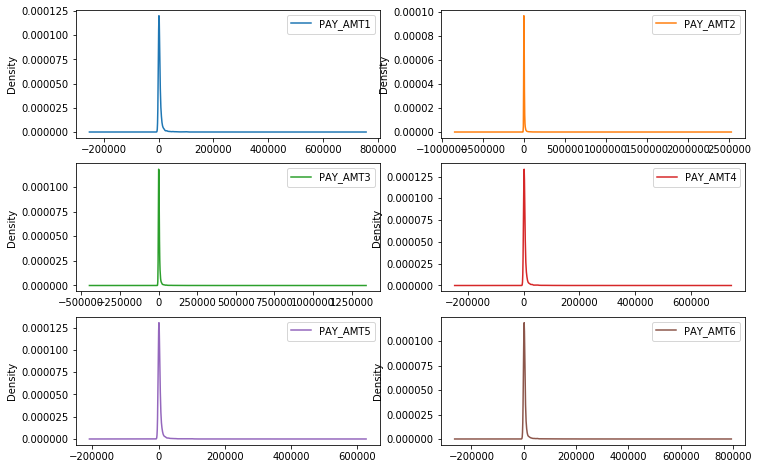

In [ ]:
df1 = df[paid_amount]
df1.plot(kind='density',subplots=True, layout=(3,2), sharex=False, sharey=False, figsize=(12, 8))
plt.show()
# very similar distributions between pay_amt variables however limit_balance is quite different

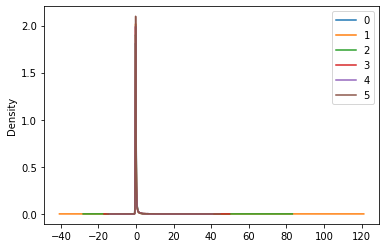

In [ ]:
df1 = df[paid_amount]
scaler = StandardScaler()
df1 = scaler.fit_transform(df1)

df1 = pd.DataFrame.from_records(df1)
df1.plot.kde()

**2.4 Data separability and Relationships**

Looking at the disrtibution and relationship between different continous variables with respect to Defaults

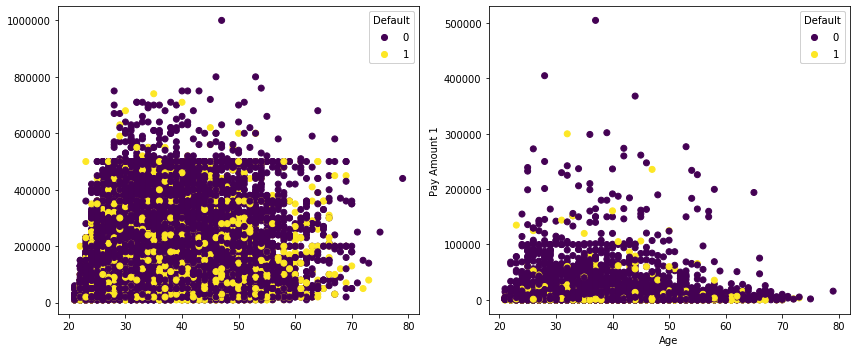

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) # creates a figure with mutiple axes
scatter = axes[0].scatter(df.AGE, df.LIMIT_BAL, c = df.Default) # plots axes one
scatter1 = axes[1].scatter(df.AGE, df.PAY_AMT1,  c = df.Default)

#creates legends
legend1 = axes[0].legend(*scatter.legend_elements(),
                    loc="top right", title="Default")
axes[0].add_artist(legend1)

legend2 = axes[1].legend(*scatter1.legend_elements(),
                    loc="top right", title="Default")
axes[1].add_artist(legend2)

plt.xlabel('Age')
plt.ylabel('Pay Amount 1')

fig.tight_layout()
plt.show()

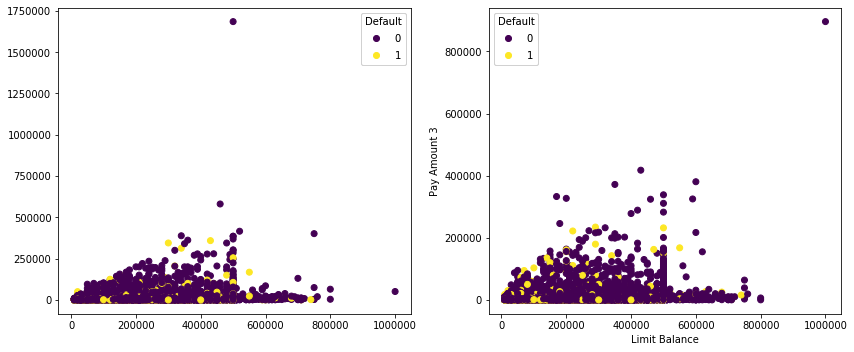

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) # creates a figure with mutiple axes
scatter = axes[0].scatter(df.LIMIT_BAL, df.PAY_AMT2, c = df.Default) # plots axes one
scatter1 = axes[1].scatter(df.LIMIT_BAL, df.PAY_AMT3,  c = df.Default)

legend1 = axes[0].legend(*scatter.legend_elements(),
                    loc="top left", title="Default") # creates legends
axes[0].add_artist(legend1)

legend2 = axes[1].legend(*scatter1.legend_elements(),
                    loc="top left", title="Default")
axes[1].add_artist(legend2)

plt.xlabel('Limit Balance')
plt.ylabel('Pay Amount 3')

fig.tight_layout()
plt.show()

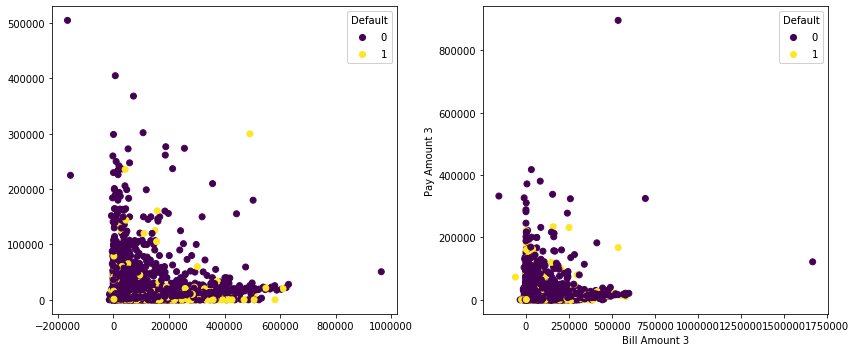

In [ ]:

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5)) # creates a figure with mutiple axes
scatter = axes[0].scatter(df.BILL_AMT1, df.PAY_AMT1, c = df.Default) # plots axes one
scatter1 = axes[1].scatter(df.BILL_AMT3, df.PAY_AMT3,  c = df.Default)

legend1 = axes[0].legend(*scatter.legend_elements(),
                    loc="top left", title="Default") # creates legends
axes[0].add_artist(legend1)

legend2 = axes[1].legend(*scatter1.legend_elements(),
                    loc="top left", title="Default")
axes[1].add_artist(legend2)

plt.xlabel('Bill Amount 3')
plt.ylabel('Pay Amount 3')

fig.tight_layout()
plt.show()

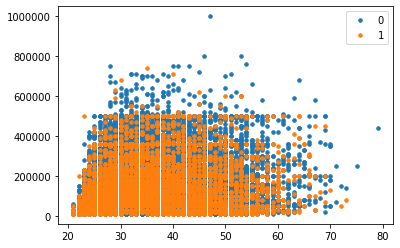

In [ ]:
groups = df.groupby('Default')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.AGE, group.LIMIT_BAL, marker = '.', linestyle='', ms=7, label=name)
ax.legend()

plt.show()

Looking at the spread and distribution of different data points with respect to defaults, We see that in 2D this data very diffcult to seperate suggesting using mutiple variables or Kernals can be a powerful technique.
We also see that it is unilkey for the data to be linearly sepreable.

**2.5 Feature Engineering**

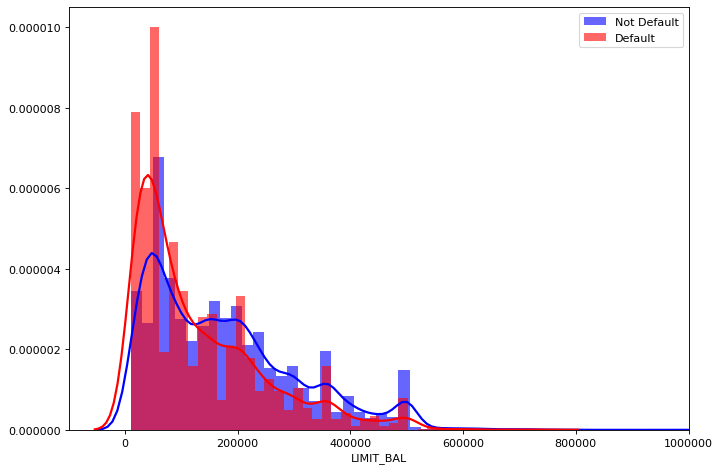

In [ ]:
x1 = df.loc[df.Default==0, 'LIMIT_BAL']
x2 = df.loc[df.Default==1 , 'LIMIT_BAL']

# plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="blue", label="Not Default", **kwargs)
sns.distplot(x2, color="red", label="Default", **kwargs)
plt.xlim(-100000,1000000);
plt.legend();

We see that here are some very extreme values, i.e customers will alot of money making very large payments, however, these are very few, most customers have much small payments.

We see that there are very high defaults in the lower balance range suggesting that people who take out lower credit loans are more prone to default, we see that those who are able to take out much larger have a lower chance of defaulting. This makes some sense as very wealth clients are more able and thus more likely to pay their debts.

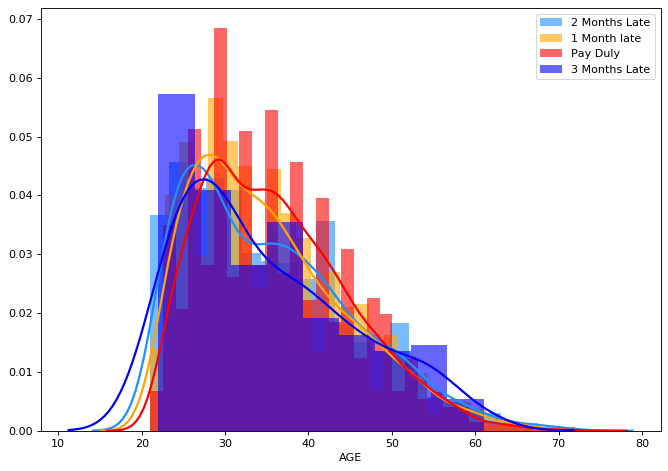

In [ ]:
x1 = df.loc[df.PAY_1==2, 'AGE'] # creating different x variables to plot
x2 = df.loc[df.PAY_1==1 , 'AGE']
x3 = df.loc[df.PAY_1==-1 , 'AGE']
x4 = df.loc[df.PAY_1==3 , 'AGE']


# plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2}) #used to format the plot

plt.figure(figsize=(10,7), dpi= 80) # formating


sns.distplot(x1, color="dodgerblue", label="2 Months Late", **kwargs) #plotting each variable
sns.distplot(x2, color="orange", label="1 Month late", **kwargs)
sns.distplot(x3, color="red", label="Pay Duly", **kwargs)
sns.distplot(x4, color="blue", label="3 Months Late", **kwargs)
;
plt.legend();

We see lots of differences between the Pay different values for the pay variable and age.

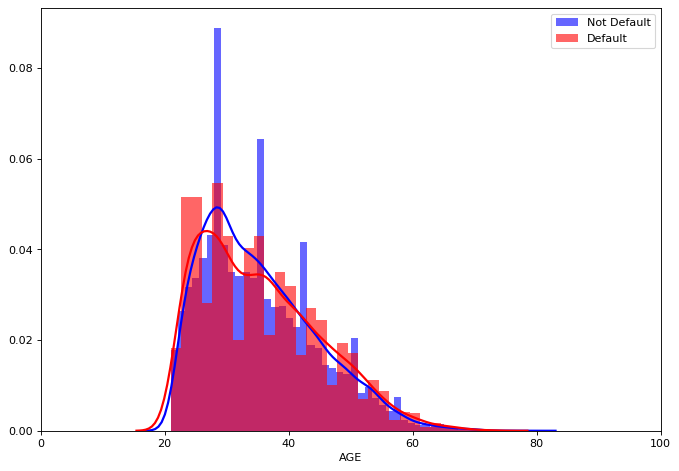

In [ ]:
#Looking at how age impacts defaults across its range
x1 = df.loc[df.Default==0, 'AGE'] # defining each variable
x2 = df.loc[df.Default==1 , 'AGE']

# plot
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})

plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(x1, color="blue", label="Not Default", **kwargs) #plotting the variables
sns.distplot(x2, color="red", label="Default", **kwargs)
plt.xlim(0,100);
plt.legend();

Creating bins of the age variable rather than using the continous values may have more predicitve power. From the graph above we see that people within the age of 28 - 38 have are less likely to default. Otherwise both densities seem to trace each other. This suggests that using ranges could be a power way to unlock information for our models.

Source:https://www.machinelearningplus.com/plots/matplotlib-histogram-python-examples/



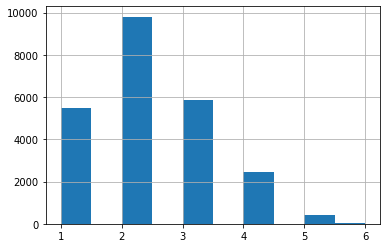

In [ ]:
df['AGEBIN'] = 0 # creates empty column 1
df.loc[((df['AGE'] > 18) & (df['AGE'] < 28)) , 'AGEBIN'] = 1 # defines the age range for catagory 1
df.loc[((df['AGE'] >= 28) & (df['AGE'] < 38)) , 'AGEBIN'] = 2 # we want to capture the predictive power in this range
df.loc[((df['AGE'] >= 38) & (df['AGE'] < 48)) , 'AGEBIN'] = 3
df.loc[((df['AGE'] >= 48) & (df['AGE'] < 58)) , 'AGEBIN'] = 4
df.loc[((df['AGE'] >= 58) & (df['AGE'] < 68)) , 'AGEBIN'] = 5
df.loc[((df['AGE'] >= 68) & (df['AGE'] < 81)) , 'AGEBIN'] = 6 #this is the rest group for convience.
df.AGEBIN.hist()
## we will asses models using our feature and the standard age feature to see the difference if any

From reading about credit card defaults we see that combinations of features maybe important. For example, combining marriage with sex, seeing how different combinations (e.g. married man, married women etc.) impact defaults


In [ ]:
df['MAR_SEX'] = df.SEX * df.MARRIAGE
df.head()
## this is an easy way of creating this variable
# 1 = married man, 2 = divorced man, 3 = single man, 4 = married woman, 5 = divorced woman, 6 = single woman

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AGEBIN,MAR_SEX
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,4
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,4
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,2,2
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,4,1


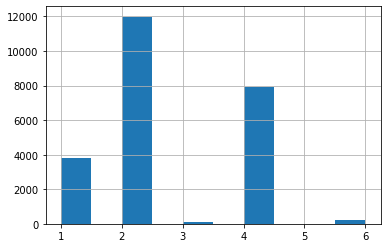

In [ ]:
df.MAR_SEX.hist()

In genral this method makes sense as from the literture we've analysed marriage has an impact on debts and defaults.

Source: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6045913/


In [ ]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default,AGEBIN,MAR_SEX
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,1,2
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,1,4
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,2,4
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,2,2
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,4,1


## 3. Methodology Overview

__3.1 Analaysing the importance of different variables__

This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
The Extra trees classfiier is a random forest technique that aggreates the results from different desciosn trees, each tree is provided with a random sample k of features, then the tree uses the Gini index to asses the information gain and form each node of the tree. This random sample of features leads to the creation of multiple de-correlated decision trees

Source: https://www.geeksforgeeks.org/ml-extra-tree-classifier-for-feature-selection/

Why extra trees not random forest?
Extra trees perform better when there is more noisy in the data set and are quicker to run and less computationally expensive.
Empircal research suggests that the optimal parameter for K is the sqrt(n) where n is the number of variables.

Sources: https://orbi.uliege.be/bitstream/2268/9357/1/geurts-mlj-advance.pdf

https://www.thekerneltrip.com/statistics/random-forest-vs-extra-tree/


In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, precision_recall_curve, confusion_matrix, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [ ]:


## Creating validation dataset
X, y = df.drop("Default", axis=1), df["Default"].copy()

# split the dataset into training and validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=15)

#Sclaing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

K = [1,3,5,7,9,11,13, 15, 17, 19, 21 ,23, 25] #testing across the hyper paramter set
accuracy, recall = [], []
for i in K: # looping over each k and running the model to fine optimal point
    model = ExtraTreesClassifier(random_state = i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_valid)
    accuracyi = accuracy_score(y_valid, y_pred) # we also use accuracy to compare how measures perform
    accuracy.append(accuracyi)
    recalli = recall_score(y_valid, y_pred) # we focus on recall score as our main measure
    recall.append(recalli)

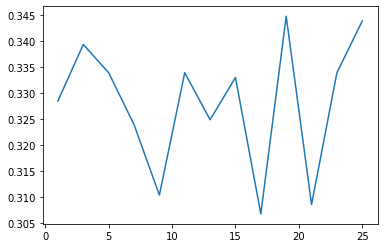

In [ ]:
plt.plot(K, recall)

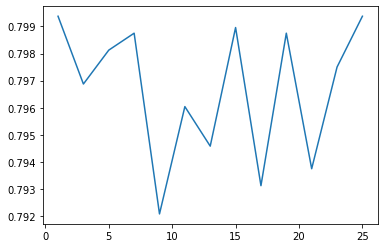

In [ ]:
plt.plot(K, accuracy)

Using the validation dataset we see that based on these accuraicies and the recall we see that the optimal parameter for K is approximatiley 19 based on the empircal evidence we have observed.

Code Sorucehttps://escholarship.org/uc/item/9zg7157q


[0.06452013 0.00739019 0.03349535 0.01175382 0.05722625 0.08555287
 0.05387057 0.03420581 0.03549383 0.02723621 0.03282035 0.0477735
 0.04475532 0.04161773 0.04122106 0.04161913 0.0427229  0.04362567
 0.04151216 0.04072064 0.03886942 0.04178406 0.04513965 0.0313733
 0.01370006]


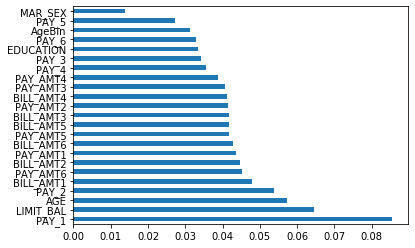

In [ ]:
## aassessing importance
X, y = df.drop("Default", axis=1), df["Default"].copy()

model = ExtraTreesClassifier(random_state = 19)
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

__3.2 Feature Selection using Recrusive Feature elimination__

Here we use recursive feature selection using the random forrest model. This is where we run the model on the whole data set and the features are given a score in terms of how much they add to the model performace based on our scoring method recall. This method used cross validation to identfy important features

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
## Creating validation dataset
X, y = df.drop("Default", axis=1), df["Default"].copy()

# split the dataset into training and validation set


In [ ]:

# Feature Extraction with RFE

data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Create a dataset with only 3 informative features

# feature extraction
#model = LogisticRegression(solver='lbfgs')
model = RandomForestClassifier()
cv =5
rfe = RFECV(RandomForestClassifier(), cv=cv, scoring='recall')
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)


Num Features: 17
Selected Features: [ True False False False  True  True  True False  True False False  True
  True  True  True  True  True  True  True  True  True  True  True False
 False]
Feature Ranking: [1 9 3 8 1 1 1 5 1 6 7 1 1 1 1 1 1 1 1 1 1 1 1 4 2]


In [ ]:
# adds the chosen features into a list
features = []
for i in range(23):
    if fit.support_[i] == True:
        features.append(df.columns[i])
features

['LIMIT_BAL',
 'AGE',
 'PAY_1',
 'PAY_2',
 'PAY_4',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

__3.3 Feature filtering using variable correlation__

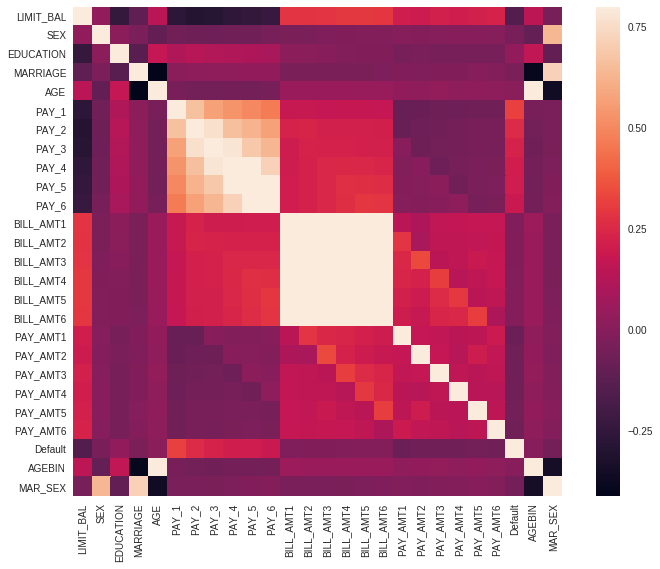

In [ ]:
corrmat = df.corr()
fig = plt.figure(figsize = (12,9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

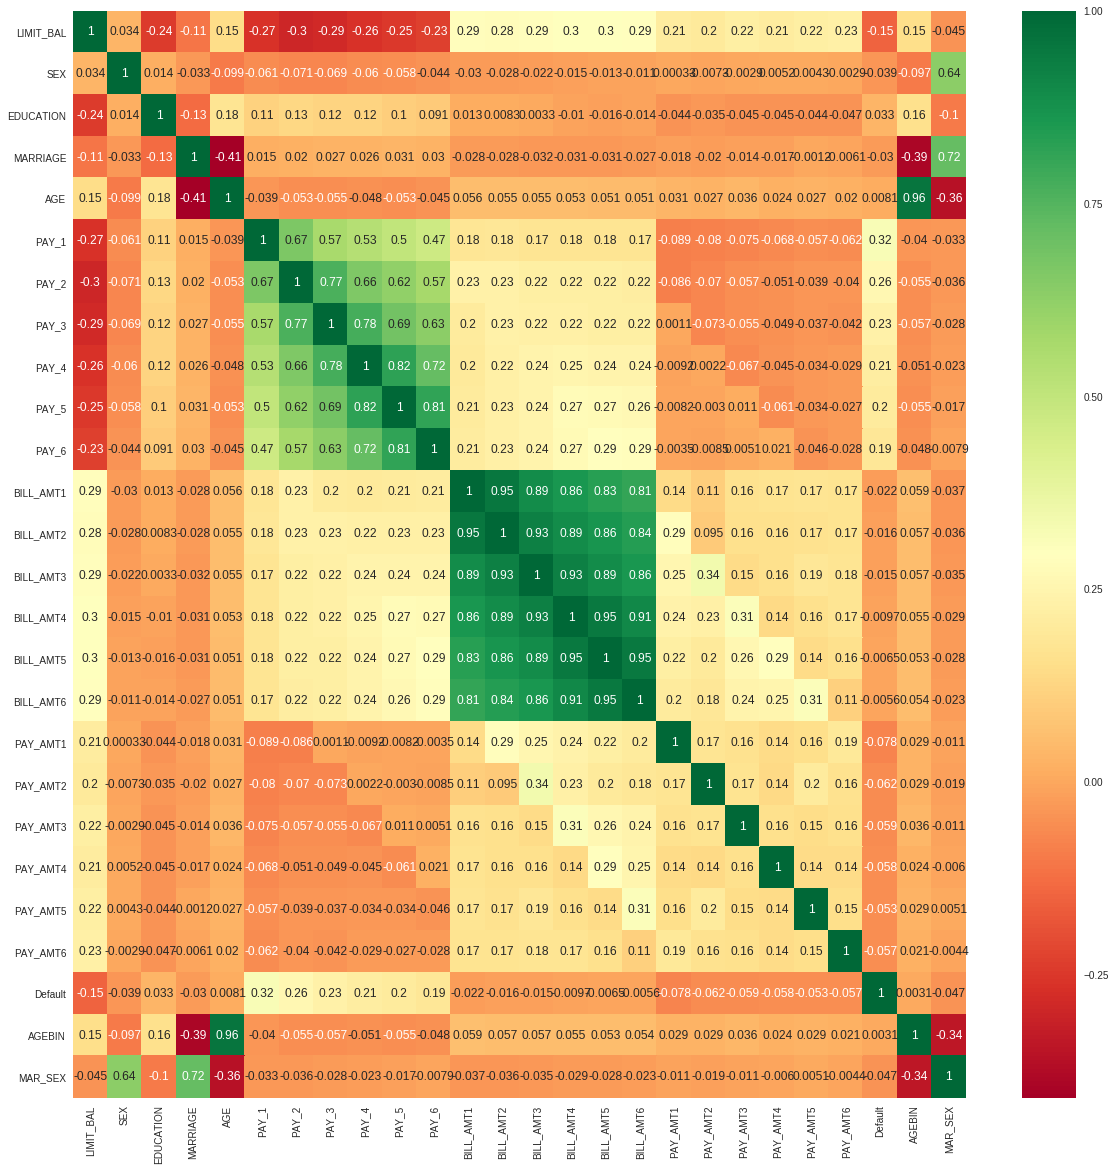

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

X, y = df.drop("Default", axis=1), df["Default"].copy()   #target column i.e price range
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Code Source: https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

Genrally we don't want to include two variables that are highly correlated as the information gained from adding the extra variable is low and thus we risk over fitting.
We see that there is high correlation between the different Bill and Pay variables, which suggests that including all of them in our models may lead to overfitting.

We also see a weak negative correlation between the pay variables and the Limit balance.

The created variables are highly correlated with their incumbent variables which makes sense as such when modelling we would like to only include only one variable.

In [ ]:
from sklearn.feature_selection import VarianceThreshold

# goes through the variables and identfies which features should be removed based on being correlated
correlated_features = set()
correlation_matrix = df.corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
print(correlated_features)


{'PAY_2', 'BILL_AMT4', 'PAY_5', 'PAY_6', 'BILL_AMT3', 'PAY_4', 'PAY_3', 'BILL_AMT2', 'AGEBIN', 'BILL_AMT6', 'MAR_SEX', 'BILL_AMT5'}


This is in line with the correlation plot and the importance ranking we have previously. As we see the bills terms are all very highly correlated to one another and so to are the Pay terms suggesting that whislt there may be information gain from having one of them, as suggested by the variable importance analysis, incorporating them all adds little value to the model and likely only leads to higher risk of overfitting.
Source: https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/


__3.4 Feature Selection using Lasso__

In [ ]:
from sklearn.feature_selection import SelectFromModel
X, y = df.drop("Default", axis=1), df["Default"].copy()

#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X_train.shape, X_test.shape
#scale data
scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [ ]:
selected_feat = X_train.columns[(sel_.get_support())]
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
      np.sum(sel_.estimator_.coef_ == 0)))
print(selected_feat)
## PAY_6 was removed by the Lasso suggesting that this feature isn't as important as the rest when it comes to predictive power and modelling.

total features: 25
selected features: 24
features with coefficients shrank to zero: 1
Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGEBIN', 'MAR_SEX'],
      dtype='object')


Combining these different feature selections we come to some important conclusions. Firstly, from the descion tree importance we see that variables PAY_1, LIMIT_BAL, and AGE are very important when it comes to these models. We also see that other variables such as bil amt and pay amt have predtive power.

We have also identfied correlated variables, these are ones we'd like to remove as they don't add much information and likely lead to overfitting as we would be fitting the noise of each variable, with out really adding much to the signal.
Recursive feature selection also supports our conlusions. Using mutiple different feature selection methods makes us less bias to one method.


In [ ]:
## Important features
features1 = ['MARRIAGE', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', "AGE", "LIMIT_BAL", "SEX"] # with orignal features
features2 = ['MAR_SEX', 'PAY_1', 'BILL_AMT1', 'PAY_AMT1', "AGEBIN", "LIMIT_BAL", ] # with new created features


## 4. Model Training and Validation

__4.1 Original features__

We'll use a basic Logistic regression with all the features as our basic model and then compare the performacnes of these based on our main performace metric Recall.
For this particular data set it make sense to use recall as our primary performance measure, as if we look at it from the banks perspetive, more money is lost when the model predicts that someone will not default and they do as the bank won't receive its loaned money.

The random forrest algorithm is a very powerful predictor, in genral what it does is aggerate the predictions of n different descison trees and uses this as it predictor. The reason why this concpet works is that if the different predictors are uncorrelated than then an aggeration of the trees should mean that some trees remove or cancel out some of the errors made by other trees, i.e overfitting the data.
"A larger number of uncorrelated models (trees) operating as a committee will outperfomr any indivdual consitient model."
A random forrest uses a technique called bagging, where the we look at the prediction made by each indivdual tree and then use a majority voting function to make the prediction for the particular case.

For tuning the SVM we can expect and see from our data exploration that its not likely that the data is linearly sperable, thus we opt to using either a guassian (RBF) or a polynomial kernal to map our SVM to higher dimensions. When tunning the SVM there was two key hyper paramters we need to tune. C this is the pentaly for misclassifcation, and can be see as a meaure of the complexity of the model the higher C is the more the model penalises misclassified data, a very high C will lead to overfitting as the model trys to avoid misclassifcation at all costs. The second hyperparamter we need to tune is gamma. Gamma is the spread of the kernal. It is the hyper paramter for the guassian Kernal and is used to handle non-linear data. The idea is that a larger gamma has a close reach where as low values mean far reach. This means that if gamma is large only points near the descion boundry are taken into account, where as when gamma is small points further away are taken into account. Thus, really high value of gamma can lead to over-fitting as the model trys to perfectly seperate the data. A very low value of gamma can mean high bias, thus underfitting as it will make the descion boundry more linear and more smooth boundry as it incorprates data that is further away.
Sources: https://chrisalbon.com/machine_learning/support_vector_machines/svc_parameters_using_rbf_kernel/
https://www.youtube.com/watch?v=m2a2K4lprQw

In [ ]:
import scipy
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_predict, cross_val_score
from statistics import mean
from sklearn.preprocessing import StandardScaler

In [ ]:
#random state
state = 1
#outlier detection methods
classifiers = {'Random Forest Classifier': RandomForestClassifier(random_state = state),
               'Support Vector Machine': SVC(random_state = state),
               'Logistic Regression': LogisticRegression()}

Here we loop over our chosen algorithms and tune use gridsearch to tune the hyperparameters. The scoring method we use is recall as this is the one that would be most relvant to the bang. Recall takes into account false negatives, i.e when the algorithm predicts someone will not default but the infact do. This is important as this is likely where the bank would lose the most money as it won't recived back the money it loaned out

In [ ]:
%%time

data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()
X = X[features1] #first set of chosen features

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == 'Random Forest Classifier':
      model = RandomForestClassifier(random_state = state)
      param_grid = {'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'log2'],  'max_depth': [  13, 17 ,20], 'criterion': ['gini', 'entropy']}
        # Combine the parameter sets with the defined model
      print("RF")
      CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
        # Fit the model to our training data and obtain best parameters
      CV_model.fit(X, y)
      print(CV_model.best_params_)
    elif clf_name == 'Support Vector Machine':
      model = SVC(random_state = state)
      param_grid = [{'kernel': ['rbf'], 'gamma': [0.001, 0.1],'C': [10, 100, 200]},
                    {'kernel': ['poly'], 'C': [1, 10, 100], 'degree': [1,2,5]}]
        # Combine the parameter sets with the defined model
      print("SVC")
      CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='recall', n_jobs=-1)
        # Fit the model to our training data and obtain best parameters
      CV_model.fit(X, y)
      print(CV_model.best_params_)


    else:
      model = LogisticRegression()
      param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,1,10,25]}
        # Combine the parameter sets with the defined model
      print("LR")
      CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
        # Fit the model to our training data and obtain best parameters
      CV_model.fit(X, y)
      print(CV_model.best_params_)
## notes even though the SVC takes a while to run i think including more paramters is a good idea as we don't know if a large C is better or a smaller gamma

RF
{'criterion': 'gini', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 100}
SVC


We then use the tuned paramters and run these models on the datset with our chosen features.

__4.2 With Feature Set 2__

In [ ]:
%%time
####
## we tested it and the hyper paramters are the same for both sets of features no need to paramterise them again.
data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()
X = X[features2] #first set of chosen features

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)



for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == 'Random Forest Classifier':
      model = RandomForestClassifier(random_state = state)
      param_grid = {'n_estimators': [50, 100, 150, 200], 'max_features': ['auto', 'log2'],  'max_depth': [ 9, 11, 13], 'criterion': ['gini', 'entropy']}
      print('RF')
        # Combine the parameter sets with the defined model
      CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
        # Fit the model to our training data and obtain best parameters
      CV_model.fit(X, y)
      print(CV_model.best_params_)
    elif clf_name == 'Logistic Regression':
      model = LogisticRegression()
      param_grid = {'penalty': ['l1', 'l2'],'C':[0.001,0.01,1,10,25]}
        # Combine the parameter sets with the defined model
      print("LR")
      CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
        # Fit the model to our training data and obtain best parameters
      CV_model.fit(X, y)
      print(CV_model.best_params_)

    else:
      model = SVC(random_state = state)
      param_grid = [{'kernel': ['rbf'], 'gamma': [0.001, 0.1],'C': [50, 100]},
                    {'kernel': ['poly'], 'C': [ 10], 'degree': [1,5]}]
      print('SVC')
        # Combine the parameter sets with the defined model
      CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)
        # Fit the model to our training data and obtain best parameters
      CV_model.fit(X, y)
      print(CV_model.best_params_)
## notes even though the SVC takes a while to run i think including more paramters is a good idea as we don't know if a large C is better or a smaller gamma

RF
{'criterion': 'gini', 'max_depth': 13, 'max_features': 'auto', 'n_estimators': 100}
SVC


In [ ]:
data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()
X = X[features1] #first set of chosen features

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)


0.8150833333333334
0.31899441340782125
[[17849   781]
 [ 3657  1713]]


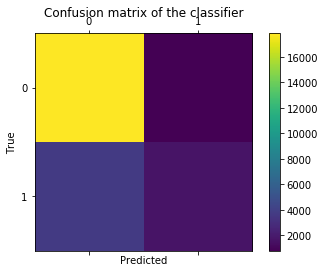

CPU times: user 14min 16s, sys: 390 ms, total: 14min 16s
Wall time: 14min 17s


In [ ]:
%%time

clf = SVC(kernel='rbf', random_state=state, gamma=1, C=100)
## around 100 probaly best from playing around with it
y_pred = cross_val_predict(clf, X, y, cv=5)
print(accuracy_score(y, y_pred))
print(recall_score(y,y_pred))


confusion_plot(y,y_pred)

## 5. Results

Now we will run other tuned models on the validation set to see how well they perform and see if any improvements can be made.

__5.1 With Standard Features__

In [ ]:
##imports
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
## to plot the confusion matrcies

def confusion_plot(y_test, y_pred) :
    labels = [0, 1]
    cm = confusion_matrix(y_test, y_pred, labels)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #cax = ax.matshow(cm, cmap = 'viridis' )
    cax = ax.matshow(cm, cmap = 'Reds' )
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    return plt.show()


In [ ]:
Greens#fit the model with tuned hyperparameters

#using tuned hyperparameters
state = 1
#outlier detenction methods
classifiers = {'Random Forest Classifier': RandomForestClassifier(criterion = 'entropy', max_depth = 13, max_features = 'auto', n_estimators = 100, random_state = state),
               'Support Vector Machine': SVC(C = 100, gamma = 0.1, kernel = 'rbf', random_state = state),
               'Naive Bayes': GaussianNB(),
               'Logistic Regression': LogisticRegression(C= 1, penalty = 'l1')}

In [ ]:
data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()
X = X[features1] #first set of chosen features

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)


Random Forest Classifier: 4397
0.8167916666666667
0.34487895716946
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     18630
           1       0.68      0.34      0.46      5370

    accuracy                           0.82     24000
   macro avg       0.76      0.65      0.67     24000
weighted avg       0.80      0.82      0.79     24000

[[17751   879]
 [ 3518  1852]]


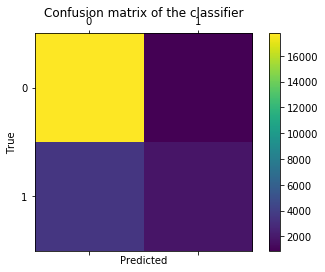

Support Vector Machine: 4438
0.8150833333333334
0.31899441340782125
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     18630
           1       0.69      0.32      0.44      5370

    accuracy                           0.82     24000
   macro avg       0.76      0.64      0.66     24000
weighted avg       0.80      0.82      0.79     24000

[[17849   781]
 [ 3657  1713]]


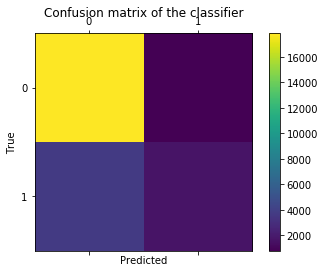

Naive Bayes: 4633
0.8069583333333333
0.3945996275605214
              precision    recall  f1-score   support

           0       0.84      0.93      0.88     18630
           1       0.61      0.39      0.48      5370

    accuracy                           0.81     24000
   macro avg       0.72      0.66      0.68     24000
weighted avg       0.79      0.81      0.79     24000

[[17248  1382]
 [ 3251  2119]]


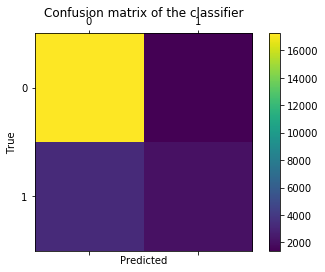

Logistic Regression: 4648
0.8063333333333333
0.2361266294227188
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18630
           1       0.70      0.24      0.35      5370

    accuracy                           0.81     24000
   macro avg       0.76      0.60      0.62     24000
weighted avg       0.79      0.81      0.77     24000

[[18084   546]
 [ 4102  1268]]


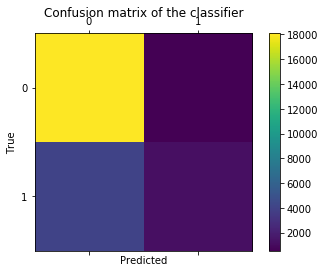

In [ ]:
#for our modeling we also want to use cross validation
#n_outliers = len(fraud)
for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == 'Random Forest Classifier':
        clf.fit(X, y)
        y_pred = cross_val_predict(clf, X, y, cv=5)
    elif clf_name == 'Support Vector Machine':
        clf.fit(X, y)
        y_pred = cross_val_predict(clf, X, y, cv=5)
    elif clf_name == 'Logistic Regression':
        clf.fit(X, y)
        y_pred = cross_val_predict(clf, X, y, cv=5)

    else:
        clf.fit(X, y)
        y_pred = cross_val_predict(clf, X, y, cv=5)



    n_errors = (y_pred != y).sum()

    #run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(recall_score(y,y_pred))
    print(classification_report(y, y_pred))
    confusion_plot(y,y_pred)


__5.2 With Engineered features__

In [ ]:
#fit the model with tuned hyperparameters

#using tuned hyperparameters
state = 1
#outlier detenction methods
classifiers = {'Random Forest Classifier': RandomForestClassifier(criterion = 'entropy', max_depth = 13, max_features = 'auto', n_estimators = 100, random_state = state),
               'Support Vector Machine': SVC(C = 100, gamma = 0.1, kernel = 'rbf', random_state = state),
               'Naive Bayes': GaussianNB(),
               'Logistic Regression': LogisticRegression(C= 1, penalty = 'l1')}

Random Forest Classifier: 4392
0.817
0.3461824953445065
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     18630
           1       0.68      0.35      0.46      5370

    accuracy                           0.82     24000
   macro avg       0.76      0.65      0.67     24000
weighted avg       0.80      0.82      0.79     24000

[[17749   881]
 [ 3511  1859]]


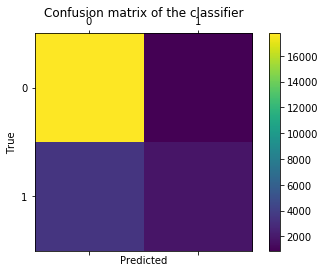

Support Vector Machine: 4430
0.8154166666666667
0.3208566108007449
              precision    recall  f1-score   support

           0       0.83      0.96      0.89     18630
           1       0.69      0.32      0.44      5370

    accuracy                           0.82     24000
   macro avg       0.76      0.64      0.66     24000
weighted avg       0.80      0.82      0.79     24000

[[17847   783]
 [ 3647  1723]]


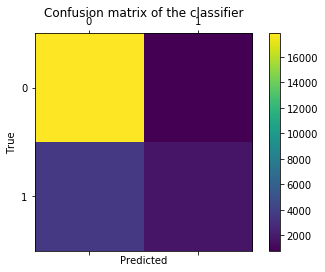

Naive Bayes: 4644
0.8065
0.3968342644320298
              precision    recall  f1-score   support

           0       0.84      0.92      0.88     18630
           1       0.60      0.40      0.48      5370

    accuracy                           0.81     24000
   macro avg       0.72      0.66      0.68     24000
weighted avg       0.79      0.81      0.79     24000

[[17225  1405]
 [ 3239  2131]]


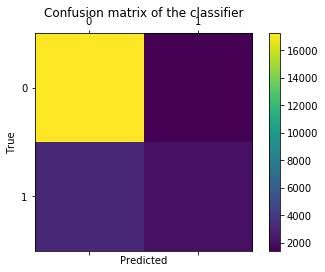

Logistic Regression: 4654
0.8060833333333334
0.23649906890130354
              precision    recall  f1-score   support

           0       0.82      0.97      0.89     18630
           1       0.70      0.24      0.35      5370

    accuracy                           0.81     24000
   macro avg       0.76      0.60      0.62     24000
weighted avg       0.79      0.81      0.77     24000

[[18076   554]
 [ 4100  1270]]


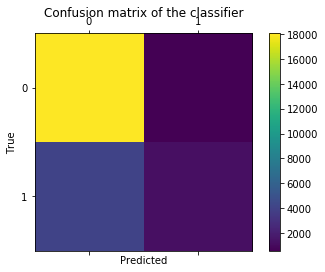

KeyError: ignored

In [ ]:
#for our modeling we also want to use cross validation
#n_outliers = len(fraud)

data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()
X = X[features2] #first set of chosen features

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

for i, (clf_name, clf) in enumerate(classifiers.items()):
    #fit the data and tag outliers
    if clf_name == 'Random Forest Classifier':
        clf.fit(X, y)
        y_pred = cross_val_predict(clf, X, y, cv=5)

    elif clf_name == 'Support Vector Machine':
        clf.fit(X, y)
        y_pred = cross_val_predict(clf, X, y, cv=5)
    elif clf_name == 'Logistic Regression':
        clf.fit(X, y)
        y_pred = cross_val_predict(clf, X, y, cv=5)

    else:
        clf.fit(X, y)
        y_pred = cross_val_predict(clf, X, y, cv=5)

    n_errors = (y_pred != y).sum()

    #run classification metrics
    print('{}: {}'.format(clf_name, n_errors))
    print(accuracy_score(y, y_pred))
    print(recall_score(y,y_pred))
    print(classification_report(y, y_pred))
    confusion_plot(y,y_pred)
result_table.set_index('classifiers', inplace=True)


When comparing the two feature sets we see that our engineered features only perform slightly better on the models than the normal features.

__5.3 Ensemble Method__

The Ensemble model we have chosen is stacking. This is where we take the algorithms that we run previous and combine them together to create one ensemble model. Stacking is where the base algorithms in our case LR, SVC and GNB are all trained on the whole training dataset. Then the preditions from these are used to on the meta-classifer which uses the predictions of these other classifiers to then predict the data. Genrally, an ensemble will outperform the indivdual models used to create it however, this is not guaranted. We have chosen to stack at 2 levels as the more levels you have the smaller the data you get to train on which could become an issue at higher levels.

Sources: https://blog.statsbot.co/ensemble-learning-d1dcd548e936

In [ ]:
data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()
X = X[features2] #first set of chosen features

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
state = 1
models = [
    SVC(C = 100, gamma = 0.1, kernel = 'rbf', random_state = state),
    LogisticRegression(C= 1, penalty = 'l1'),
    GaussianNB()
]

#performs better than the classifier than includes knn in terms of recall, accuracy is similar

In [ ]:
!pip install -q vecstack
from vecstack import stacking

In [ ]:



S_train, S_test = stacking(models, X_train, y_train, X_test, regression=False, mode='oof_pred_bag', needs_proba=False,

save_dir=None, metric=recall_score, n_folds=5, stratified=True,shuffle=True,  random_state=0, verbose=2)

task:         [classification]
n_classes:    [2]
metric:       [recall_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [SVC]
    fold  0:  [0.31242741]
    fold  1:  [0.31242741]
    fold  2:  [0.31860465]
    fold  3:  [0.33139535]
    fold  4:  [0.33023256]
    ----
    MEAN:     [0.32101748] + [0.00831887]
    FULL:     [0.32101348]

model  1:     [LogisticRegression]
    fold  0:  [0.22996516]
    fold  1:  [0.23228804]
    fold  2:  [0.26744186]
    fold  3:  [0.24302326]
    fold  4:  [0.23139535]
    ----
    MEAN:     [0.24082273] + [0.01409272]
    FULL:     [0.24081822]

model  2:     [GaussianNB]
    fold  0:  [0.44134727]
    fold  1:  [0.35540070]
    fold  2:  [0.38488372]
    fold  3:  [0.40697674]
    fold  4:  [0.38953488]
    ----
    MEAN:     [0.39562866] + [0.02824835]
    FULL:     [0.39562994]



Source: https://towardsdatascience.com/automate-stacking-in-python-fc3e7834772e

In [ ]:

model =  RandomForestClassifier(criterion = 'entropy', max_depth = 13, max_features = 'auto', n_estimators = 100, random_state = state)



En_model = model.fit(S_train, y_train)
En_y_pred = model.predict(S_test)


#lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
#lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

print('Final Accuracy score: [%.8f]' % accuracy_score(y_test, En_y_pred))
print('Final Recall score: [%.8f]' % recall_score(y_test, En_y_pred))
confusion_plot(y_test, En_y_pred)
### Scores with SVC as meta classifier: 0.81750000, 0.32116105
### Scores with NB as meta classifier: 0.81833333, 0.32677903
### Scores with LR as meta classifier: 0.81666667, 0.31086142
### Scores with RF as meta classifier: 0.80833333, 0.37734082
### Scores Meta classifer = XGB, all models:0.81750000, 0.32116105
## The best in terms of recall for our meta classifier is the RF

Final Accuracy score: [0.81625000]
Final Recall score: [0.31086142]
[[3586  146]
 [ 736  332]]


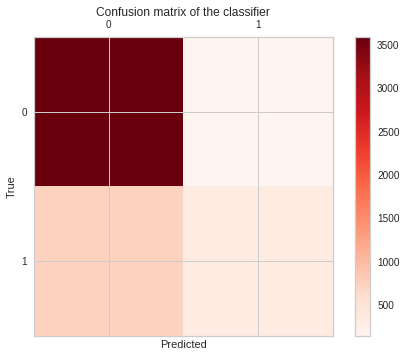

In [ ]:
print('Final Accuracy score: [%.8f]' % accuracy_score(y_test, En_y_pred))
print('Final Recall score: [%.8f]' % recall_score(y_test, En_y_pred))
confusion_plot(y_test, En_y_pred)

We ran our ensemble with different meta-classifers each time and noted down the accuracy and recall produced, we see that the best meta classifier for our model is the random forrest interms of recall performance, accuracy remains quite consistent.

__5.4 Preicsion Recall Curves__

https://classeval.wordpress.com/introduction/introduction-to-the-precision-recall-plot/
Why Precison Recall curves are better for imbalanced data.
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4349800/

Since SVM is a discrimant classification techique it does not directly learn proabilites, however, these can be estimated where the output from the SVC is taken and a cross validated logistic regression is used to output the probailites for the predictions that this SVM model makes. Since the SVM doesnt out put its own proabilites these are just estimates and thus are less reliable.
Source: https://chrisalbon.com/machine_learning/support_vector_machines/calibrate_predicted_probabilities_in_svc/


In [ ]:
pip install -U scikit-learn

     |████████████████████████████████| 7.0MB 2.7MB/s 
  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:
      Successfully uninstalled scikit-learn-0.21.3


In [ ]:
from sklearn.metrics import precision_recall_curve
#from sklearn.metrics import plot_precision_recall_curve
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from matplotlib import pyplot
from matplotlib.pyplot import figure

In [ ]:
data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()
X = X[features2] #first set of chosen features

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)
plot_RP(X_train, y_train, X_test, y_test, classifiers)

In [ ]:
data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()
X = X[features1] #first set of chosen features

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

task:         [classification]
n_classes:    [2]
metric:       [recall_score]
mode:         [oof_pred_bag]
n_models:     [3]

model  0:     [LogisticRegression]
    fold  0:  [0.22996516]
    fold  1:  [0.22880372]
    fold  2:  [0.26046512]
    fold  3:  [0.24302326]
    fold  4:  [0.23488372]
    ----
    MEAN:     [0.23942819] + [0.01164953]
    FULL:     [0.23942352]

model  1:     [GaussianNB]
    fold  0:  [0.44134727]
    fold  1:  [0.34959350]
    fold  2:  [0.38720930]
    fold  3:  [0.40000000]
    fold  4:  [0.38488372]
    ----
    MEAN:     [0.39260676] + [0.02956084]
    FULL:     [0.39260809]

model  2:     [SVC]
    fold  0:  [0.31010453]
    fold  1:  [0.31126597]
    fold  2:  [0.31162791]
    fold  3:  [0.33837209]
    fold  4:  [0.32674419]
    ----
    MEAN:     [0.31962294] + [0.01119466]
    FULL:     [0.31961878]



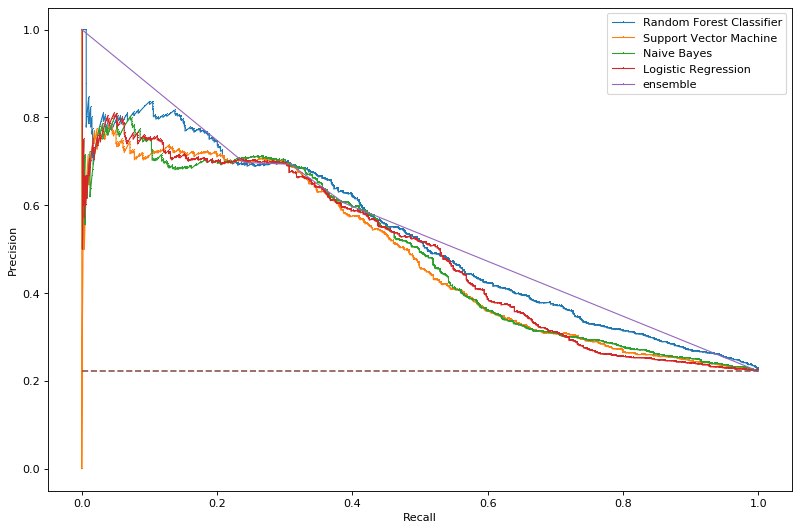

In [ ]:

classifiers = {'Random Forest Classifier': RandomForestClassifier(criterion = 'entropy', max_depth = 13, max_features = 'auto', n_estimators = 100, random_state = state),
               'Support Vector Machine': SVC(C = 100, gamma = 0.1, kernel = 'rbf', random_state = state, probability = True),
               'Naive Bayes': GaussianNB(),
               'Logistic Regression': LogisticRegression(C= 1, penalty = 'l1'),
               'ensemble': RandomForestClassifier(criterion = 'entropy', max_depth = 13, max_features = 'auto', n_estimators = 100, random_state = state) }



figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
def plot_RP (X_train, y_train, X_test, y_test, classifiers):
  for i, (clf_name, clf) in enumerate(classifiers.items()):
    if clf_name == "ensemble":
      state = 1
      models = [ LogisticRegression(C= 1, penalty = 'l1'), GaussianNB(),SVC(C = 100, gamma = 0.1, kernel = 'rbf', random_state = state)]
      S_train, S_test = stacking(models, X_train, y_train, X_test, regression=False, mode='oof_pred_bag', needs_proba=False,
                                 save_dir=None, metric=recall_score, n_folds=5, stratified=True,shuffle=True,  random_state=0, verbose=2)
      model = clf.fit(S_train, y_train)
      y_pred = model.predict(S_test)
      lr_probs = model.predict_proba(S_test)
      lr_probs = lr_probs[:, 1]
      yhat = model.predict(S_test)


      lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
      #lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

    else:
      model = clf
      model.fit(X_train, y_train)
      lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
      lr_probs = lr_probs[:, 1]
      # predict class values
      yhat = model.predict(X_test)
      lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
      # summarize scores

    # plot the precision-recall curves
    kwargs={'linewidth':1}
    pyplot.plot(lr_recall, lr_precision, marker=',', label=clf_name, **kwargs)
    # axis labels
    pyplot.xlabel('Recall')
    pyplot.ylabel('Precision')
    # show the legend
    pyplot.legend()
  no_skill = len(y_test[y_test==1]) / len(y_test)
  pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
  return pyplot.show()
plot_RP(X_train, y_train, X_test, y_test, classifiers)

__ROC Curves__

In [ ]:
def plot_ROC(result_table):
  fig = plt.figure(figsize=(10,8))
  for i in result_table.index: plt.plot(result_table.loc[i]['fpr'], result_table.loc[i]['tpr'], label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
  plt.plot([0,1], [0,1], color='orange', linestyle='--')

  plt.xticks(np.arange(0.0, 1.1, step=0.1))
  plt.xlabel("False Positive Rate", fontsize=15)

  plt.yticks(np.arange(0.0, 1.1, step=0.1))
  plt.ylabel("True Positive Rate", fontsize=15)

  plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
  plt.legend(prop={'size':13}, loc='lower right')

  return plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [RandomForestClassifier(criterion = 'entropy', max_depth = 13, max_features = 'auto', n_estimators = 100, random_state = state),
               GaussianNB(),  LogisticRegression(C= 1, penalty = 'l1'), SVC(C = 100, gamma = 0.1, kernel = 'rbf', random_state = state, probability = True)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]

    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)

    result_table = result_table.append({'classifiers':cls.__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


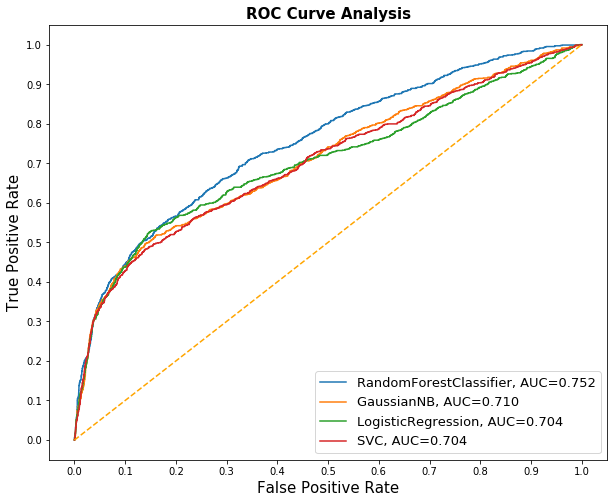

In [ ]:
plot_ROC(result_table)

Source: https://abdalimran.github.io/2019-06-01/Drawing-multiple-ROC-Curves-in-a-single-plot

## Final Predications on Test Set

Here we will compare the performance of our tuned models on the test data set, and see how this compares to the validation set. We will explore potential reasons behind the conclusions and present them in a user-friendly way.

In [ ]:
### imports
import io


In [ ]:
test_data = pd.read_csv(io.BytesIO(uploaded['CreditCard_test.csv']), header=1)
test_data.shape

(6000, 25)

In [ ]:
data = df
X, y = data.drop("Default", axis=1), df["Default"].copy()
X = X[features2] #first set of chosen features

#scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
test_data.columns = ["ID", 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', "Default"]


test_data = test_data.drop("ID", axis =1) # remove ID collumn has no predictive power
test_data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,50000,1,2,2,23,2,2,0,0,0,0,51246,49758,48456,44116,21247,20066,8,2401,2254,2004,704,707,0
1,60000,1,2,2,26,0,0,0,0,0,0,58072,59040,57416,55736,26958,28847,2282,2324,2049,2000,3000,1120,1
2,400000,1,2,2,27,0,0,0,0,0,0,15330,8626,11470,10745,20737,9545,2501,10009,1437,1105,510,959,0
3,20000,1,5,2,27,5,4,3,2,2,2,21673,21051,20440,19709,20113,19840,0,0,0,900,0,0,0
4,50000,1,3,2,27,0,0,-2,-2,-1,-1,32590,-100,0,0,70,120,0,100,0,70,200,100,0


In [ ]:
##Replace extra values in the education field with 4 i.e other catgory as there is no 5 or 6

fil = (test_data.EDUCATION == 5) | (test_data.EDUCATION == 6) | (test_data.EDUCATION == 0)
test_data.loc[fil, 'EDUCATION'] = 4
test_data.EDUCATION.value_counts()


## As for marriage values of 0 can be changed to 3 i.e other.
test_data.loc[test_data.MARRIAGE == 0, 'MARRIAGE'] = 3
test_data.MARRIAGE.value_counts()

## As for marriage values of 0 can be changed to 3 i.e other.
test_data.loc[test_data.MARRIAGE == 0, 'MARRIAGE'] = 3
test_data.MARRIAGE.value_counts()

2    3087
1    2846
3      67
Name: MARRIAGE, dtype: int64

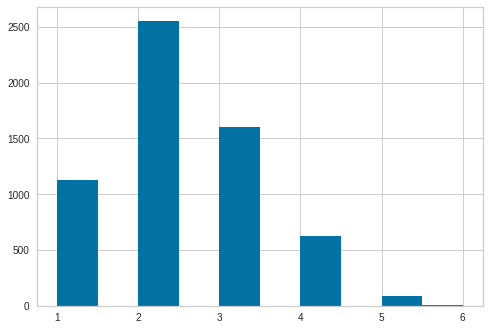

In [ ]:
df1 = test_data
df1['AGEBIN'] = 0
df1.loc[((df1['AGE'] > 18) & (df1['AGE'] < 28)) , 'AGEBIN'] = 1
df1.loc[((df1['AGE'] >= 28) & (df1['AGE'] < 38)) , 'AGEBIN'] = 2 # we want to capture the predictive power in this range
df1.loc[((df1['AGE'] >= 38) & (df1['AGE'] < 48)) , 'AGEBIN'] = 3
df1.loc[((df1['AGE'] >= 48) & (df1['AGE'] < 58)) , 'AGEBIN'] = 4
df1.loc[((df1['AGE'] >= 58) & (df1['AGE'] < 68)) , 'AGEBIN'] = 5
df1.loc[((df1['AGE'] >= 68) & (df1['AGE'] < 81)) , 'AGEBIN'] = 6 #this is the rest group for convience.

df1['MAR_SEX'] = df1.SEX * df1.MARRIAGE
df1.head()
df1.AGEBIN.hist()
## we will asses models using our feature and the standard age feature to see the difference if any

In [ ]:
data = df1
X_test, y_test = data.drop("Default", axis=1), data["Default"].copy()
 #first set of chosen features
X_test = X_test[features2]
#scale features
scaler = StandardScaler()
X_test = scaler.fit_transform(X_test)

X_test.shape, y_test.shape

((6000, 6), (6000,))

Recall:  0.315956, Accuracy :  0.829333
Precision:  0.716846, F1_Score :  0.438596
[[4576  158]
 [ 866  400]]


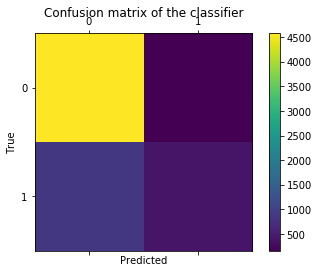

Recall:  0.431280, Accuracy :  0.820500
Precision:  0.604651, F1_Score :  0.503458
[[4377  357]
 [ 720  546]]


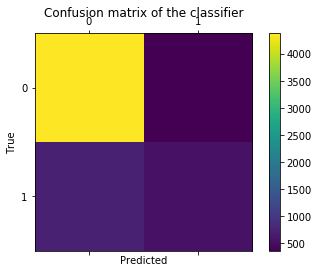

Recall:  0.244076, Accuracy :  0.820500
Precision:  0.720280, F1_Score :  0.364602
[[4614  120]
 [ 957  309]]


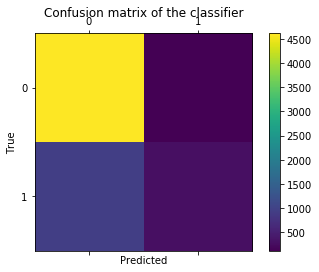

Recall:  0.324645, Accuracy :  0.829833
Precision:  0.712305, F1_Score :  0.446012
[[4568  166]
 [ 855  411]]


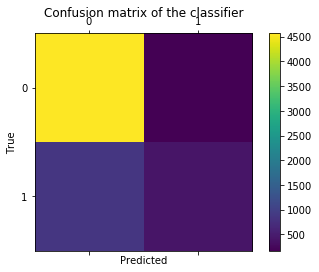

In [ ]:
models = [RandomForestClassifier(criterion = 'entropy', max_depth = 8, max_features = 'auto', n_estimators = 150, random_state = state),
               GaussianNB(),  LogisticRegression(C= 1, penalty = 'l1'), SVC(C = 100, gamma = .1, kernel = 'rbf', random_state = state)]


for i in models:
  model = i
  model.fit(X,y)
  y_pred = model.predict(X_test)
  print("Recall: % 5.6f, Accuracy : % 5.6f" %(recall_score(y_test, y_pred), accuracy_score(y_test, y_pred)))
  print("Precision: % 5.6f, F1_Score : % 5.6f" %(precision_score(y_test, y_pred), f1_score(y_test, y_pred)))
  confusion_plot(y_test, y_pred)